In [1]:
import pandas as pd
df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
print("shape:",df.shape)
print("missing values:",df.isnull().sum().sum())
print("fraud count:",df['Class'].value_counts())

shape: (284807, 31)
missing values: 0
fraud count: Class
0    284315
1       492
Name: count, dtype: int64


In [3]:
#visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

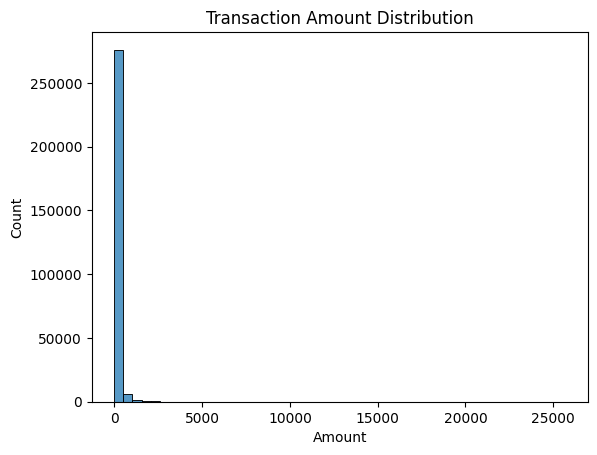

In [4]:
#Distribution of Amounts
sns.histplot(df["Amount"] , bins = 50)
plt.title("Transaction Amount Distribution")
plt.show()

In [5]:
# Correlation with Fraud
correlation = df.corr()['Class'].sort_values(ascending=False)
print(correlation.head(10))

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


In [6]:
#Feature Engineering
df['Hour'] = ((df['Time'] // 3600) % 24).astype(int)
from sklearn.preprocessing import StandardScaler
df['NormAmount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time', 'Amount'], axis=1)

In [7]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest

features = df.drop(['Class'], axis=1)

# Fit the model
iso = IsolationForest(contamination=0.002)  # 0.2% suspected fraud
df['risk_score'] = iso.fit_predict(features)

# Transform -1 to "risky", 1 to "safe"
df['risk_score'] = df['risk_score'].apply(lambda x: 1 if x == -1 else 0)

In [10]:
df[['NormAmount', 'Hour', 'risk_score', 'Class'] + list(df.columns[:5])].to_csv('fraud_scores.csv', index=False)